# Map Analysis

This notebook is for analyzing a ton of randomly generated maps to give competitors some nice insight on what to expect and to also help us balance map generation to encourage diversity in strategy and improve the competition in general!

In [158]:
# to get the data, run mapanalysis.ts first with ts-node mapanalysis.ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
resources = ['wood', 'coal', 'uranium']

In [159]:
df = pd.read_json("mapgendist.json")

In [160]:
df.head()

,12,16,24,32
resources,"[{'wood': 8410, 'coal': 1542, 'uranium': 3290,...","[{'wood': 9554, 'coal': 3118, 'uranium': 3128,...","[{'wood': 15144, 'coal': 4476, 'uranium': 1330...","[{'wood': 21684, 'coal': 5508, 'uranium': 7196..."
count,2493,2550,2518,2439
resourceprox,"[[{'0': {'wood': 0, 'coal': 0, 'uranium': 0, '...","[[{'0': {'wood': 0, 'coal': 0, 'uranium': 0, '...","[[{'0': {'wood': 0, 'coal': 0, 'uranium': 0, '...","[[{'0': {'wood': 0, 'coal': 0, 'uranium': 0, '..."


In [161]:
rows = []
resourceprox = {
    12: [],
    16: [],
    24: [],
    32: []
}
resourceprox_labels = ["wood", "coal", "uranium", "woodTiles", "coalTiles", "uraniumTiles"]
for k in df.keys():
    for r in df[k]['resources']:
        rowdata = [r['wood'], r['coal'], r['uranium'], r['woodTiles'], r['coalTiles'], r['uraniumTiles'], k]
        rows.append(rowdata)
    i = 0
    for r in df[k]['resourceprox']:
#         rows[i].append(r)
        map_resource_prox = []
        for _, datas in r[0].items():
            map_resource_prox.append([
                datas['wood'], datas['coal'], datas['uranium'],
                datas['woodTiles'], datas['coalTiles'], datas['uraniumTiles']
            ])
        resourceprox[k].append(np.array(map_resource_prox))

In [162]:
data = pd.DataFrame(np.array(rows), columns=
                    ['wood', 'coal', 'uranium', 'woodTiles', 'coalTiles', 'uraniumTiles', 'size']
                   )

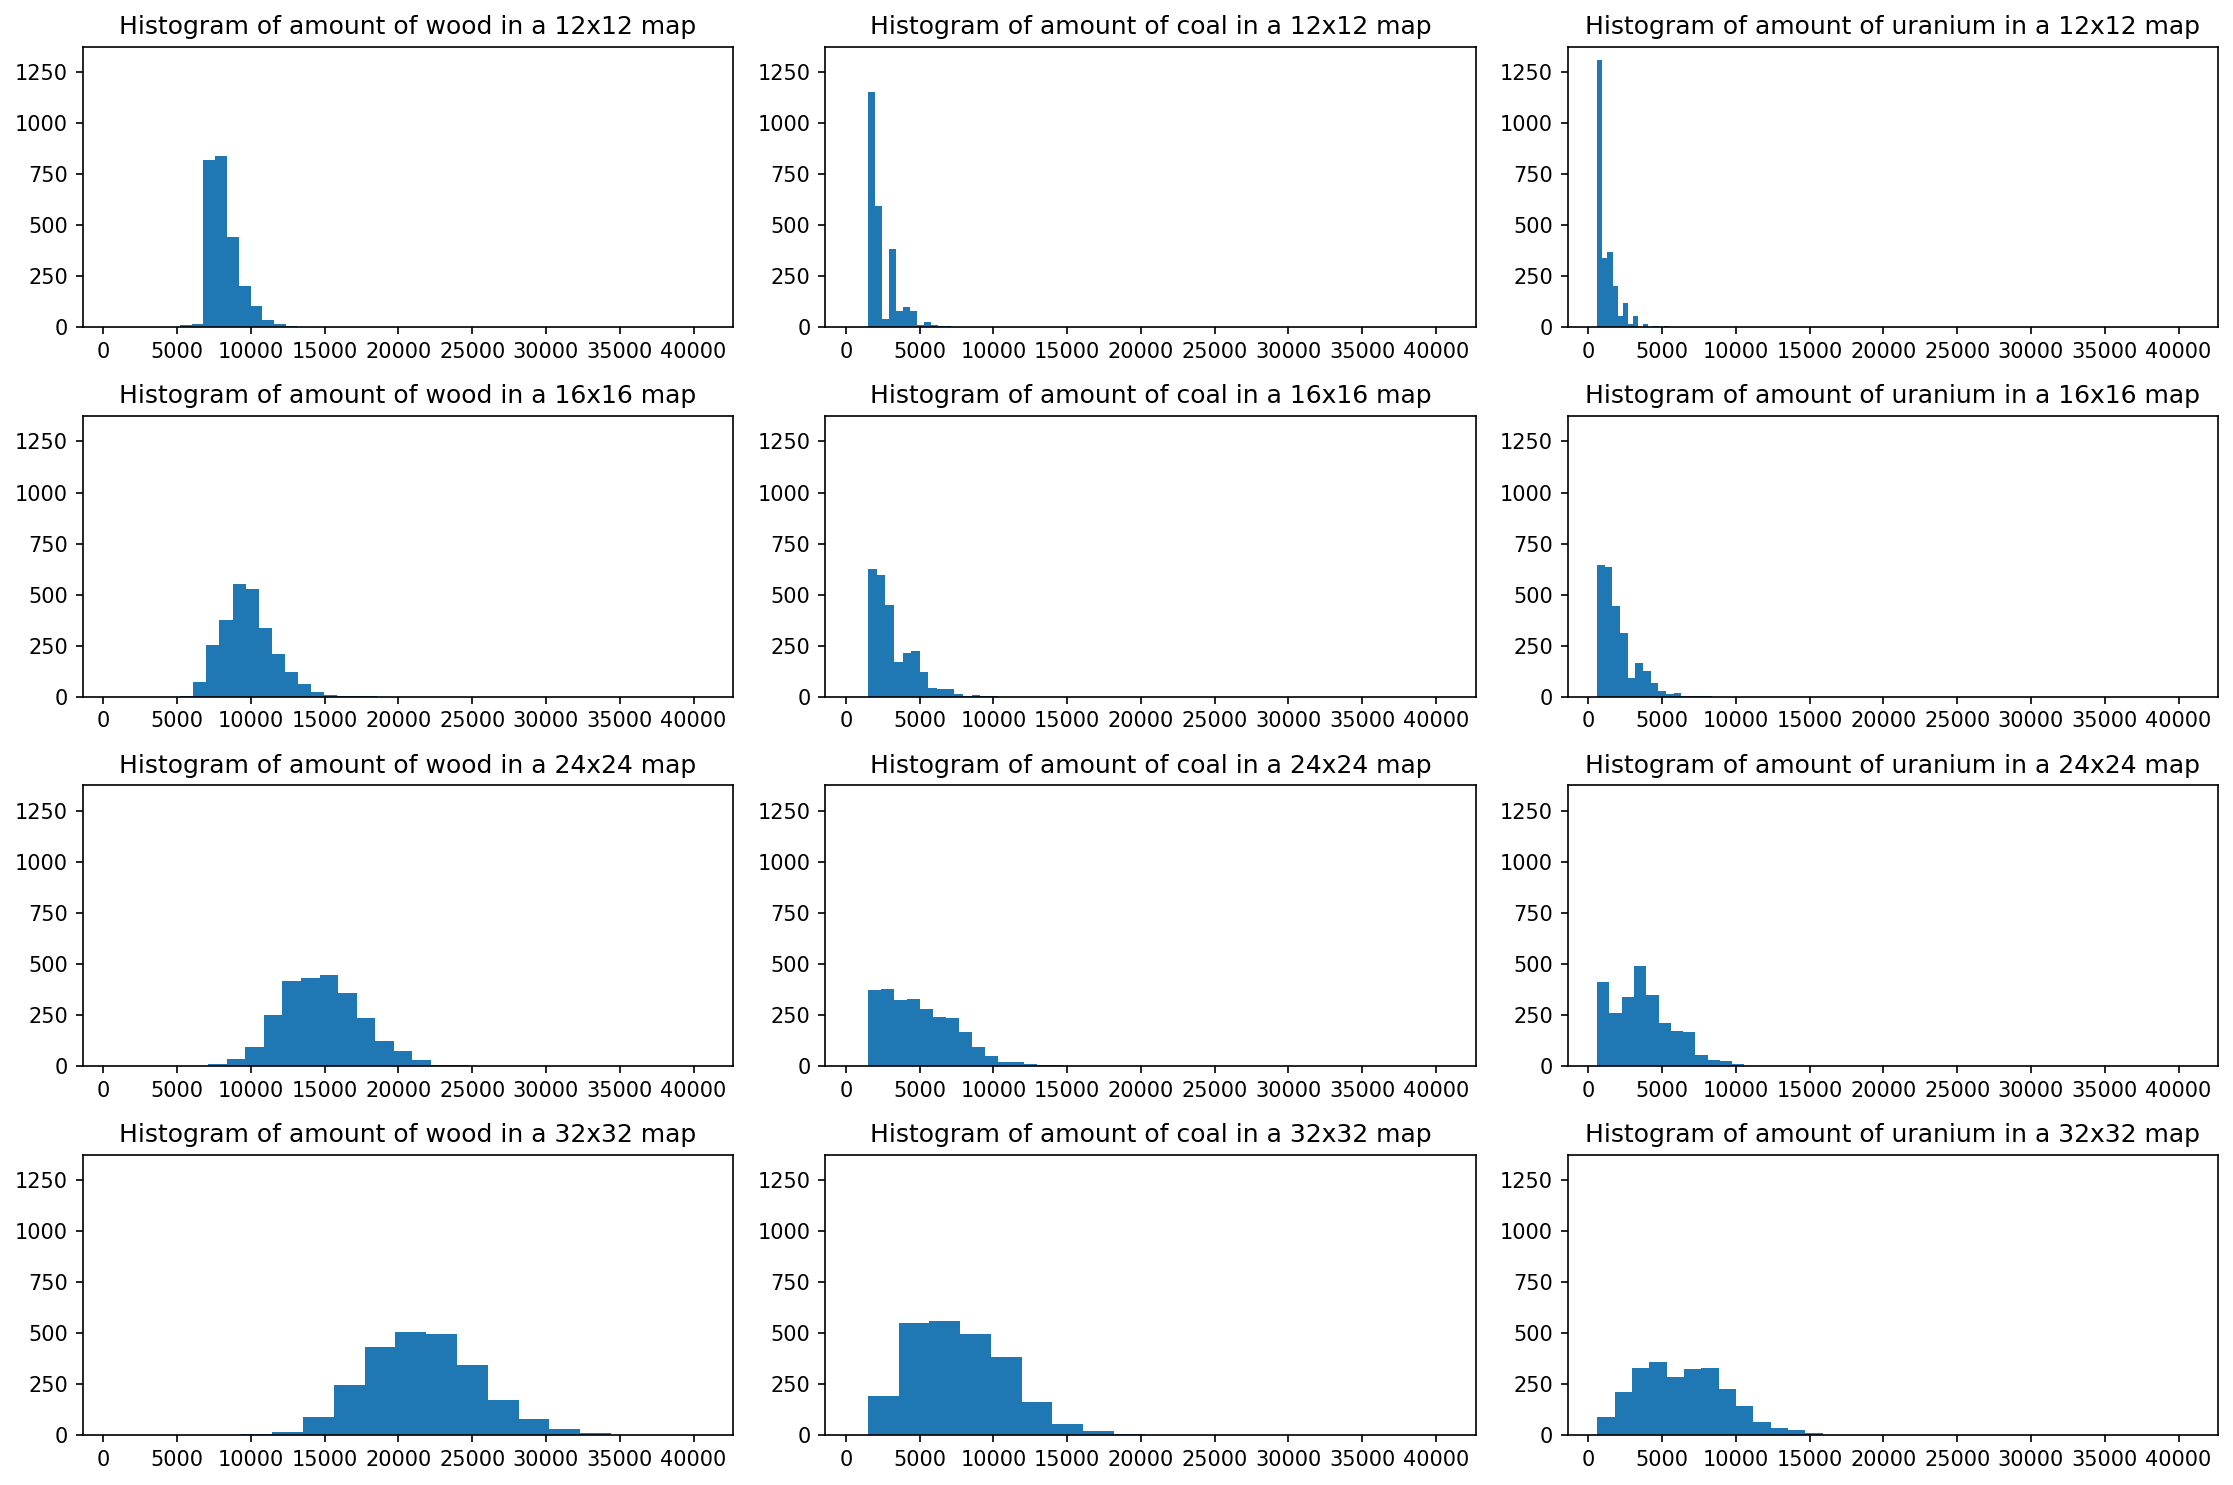

In [163]:
fig = plt.figure(figsize=(15,10))
ax = None
for j, size in enumerate([12,16,24,32]):

    for i, r in enumerate(resources):
        k = (i+1 + j*len(resources))
        ax = plt.subplot(4, 3, k, sharex=ax, sharey=ax)
        plt.hist(data[data['size'] == size][r], bins=15)
        plt.title(f"Histogram of amount of {r} in a {size}x{size} map")
plt.tight_layout()

## Look at statistics for tile and resource unit counts

In [164]:
data.groupby('size').describe()['woodTiles']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2493.0,15.622142,3.142423,8.0,14.0,14.0,18.0,34.0
16,2550.0,20.359216,4.815911,10.0,16.0,20.0,24.0,44.0
24,2518.0,34.745036,7.669637,12.0,30.0,34.0,40.0,66.0
32,2439.0,54.406724,10.934748,20.0,46.0,54.0,62.0,108.0


In [165]:
data.groupby('size').describe()['wood']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2493.0,8157.707180,1118.772054,2790.0,7478.0,7866.0,8854.0,14784.0
16,2550.0,9809.640784,1699.308157,5214.0,8450.5,9669.0,10955.0,18518.0
24,2518.0,14834.547260,2685.159765,7122.0,12971.0,14715.0,16526.0,25952.0
32,2439.0,21707.380074,3828.379915,9362.0,19016.0,21572.0,24178.0,40678.0


In [166]:
data.groupby('size').describe()['coalTiles']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2493.0,6.094665,2.621192,4.0,4.0,6.0,8.0,22.0
16,2550.0,8.043137,3.774710,4.0,6.0,8.0,10.0,26.0
24,2518.0,12.967434,6.073949,4.0,8.0,12.0,16.0,38.0
32,2439.0,20.021320,8.460856,4.0,14.0,20.0,26.0,84.0


In [167]:
data.groupby('size').describe()['coal']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2493.0,2369.166466,1009.116851,1500.0,1570.0,2244.0,3026.0,8576.0
16,2550.0,3118.040000,1454.372270,1500.0,2168.0,3004.0,3888.0,10288.0
24,2518.0,5021.218427,2351.179849,1502.0,3122.5,4678.0,6376.0,14748.0
32,2439.0,7747.860599,3272.645190,1504.0,5374.0,7610.0,9951.0,32754.0


In [168]:
data.groupby('size').describe()['uraniumTiles']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2493.0,3.614120,2.262187,2.0,2.0,2.0,4.0,18.0
16,2550.0,5.912157,3.728124,2.0,2.0,4.0,8.0,26.0
24,2518.0,11.407466,6.216206,2.0,6.0,10.0,16.0,40.0
32,2439.0,19.798278,9.199385,2.0,12.0,20.0,26.0,56.0


In [169]:
data.groupby('size').describe()['uranium']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
12,2493.0,1172.583233,735.564285,600.0,646.0,694.0,1338.0,5806.0
16,2550.0,1917.017255,1209.475281,600.0,698.0,1385.0,2610.0,8386.0
24,2518.0,3703.447975,2018.678047,600.0,1992.0,3310.0,5121.5,13076.0
32,2439.0,6422.899549,2987.388615,602.0,3977.0,6366.0,8418.0,18232.0


In [207]:
def plot_averages_across_distance(size=32):
    """
    """
    d = 99
    for r in resourceprox[size]:
        d = min(d, len(r))
    data = np.zeros((len(resourceprox[size]), d, 6))
    i = 0
    for r in resourceprox[size]:
        data[i] = r[:d, :]
        i+= 1
    
    fig = plt.figure(figsize=(15,8))
    fig.set_facecolor('white')
    for i, label in enumerate(resourceprox_labels):
        plt.subplot(2, 3, i+1)
        plt.xlabel(f"Manhattan Distance from starting citytile on {size}x{size} maps")
        plt.ylabel("average " + label)
        plt.grid(which='major')
#         print(data[:,:,resourceprox_labels.index(label)].shape)
        avgs = data[:,:,resourceprox_labels.index(label)].mean(0)
        
        err = data[:,:,resourceprox_labels.index(label)].std(0)
        lo = avgs-err*2
        lo[lo < 0] = 0
        plt.fill_between(np.arange(0, d), avgs+err*2, lo, alpha=0.05, color='blue', label="2σ")
        lo = avgs-err
        lo[lo < 0] = 0
        plt.fill_between(np.arange(0, d), avgs+err, lo, alpha=0.15, color='blue', label="1σ")
        plt.plot(avgs, label="µ")
        plt.legend()

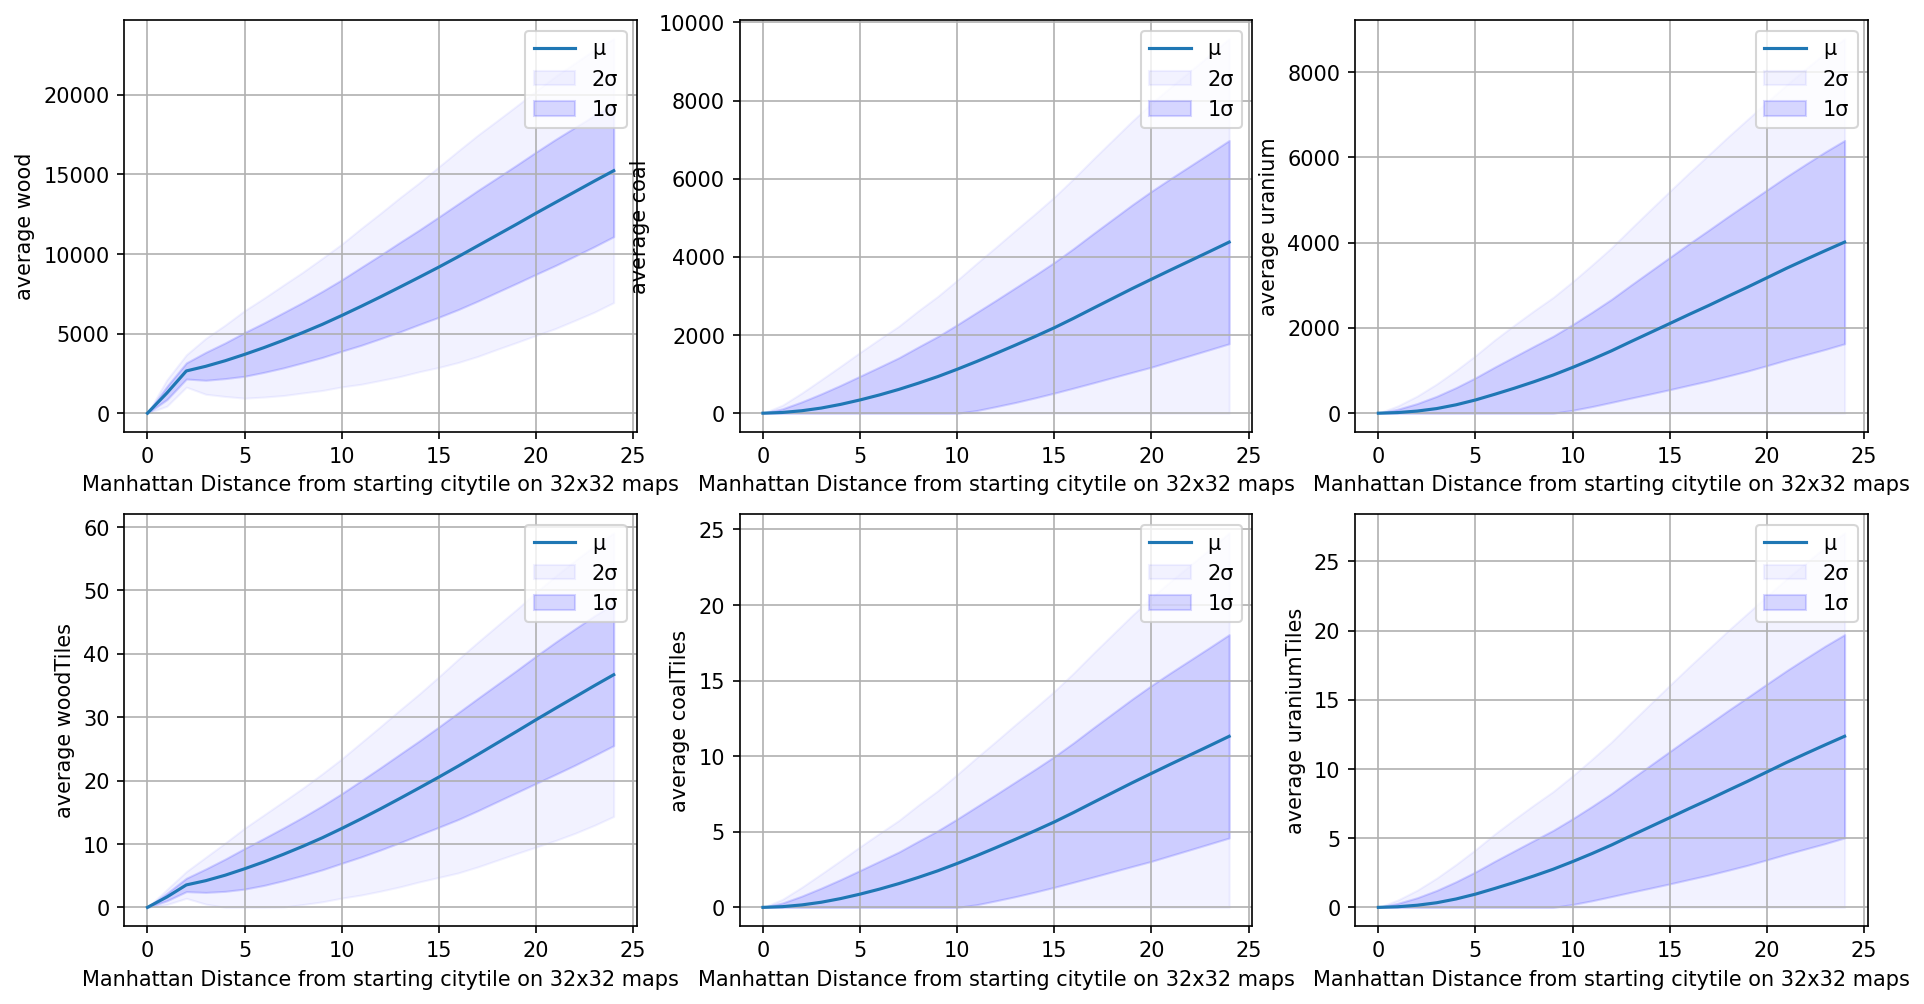

In [208]:
plot_averages_across_distance(32)

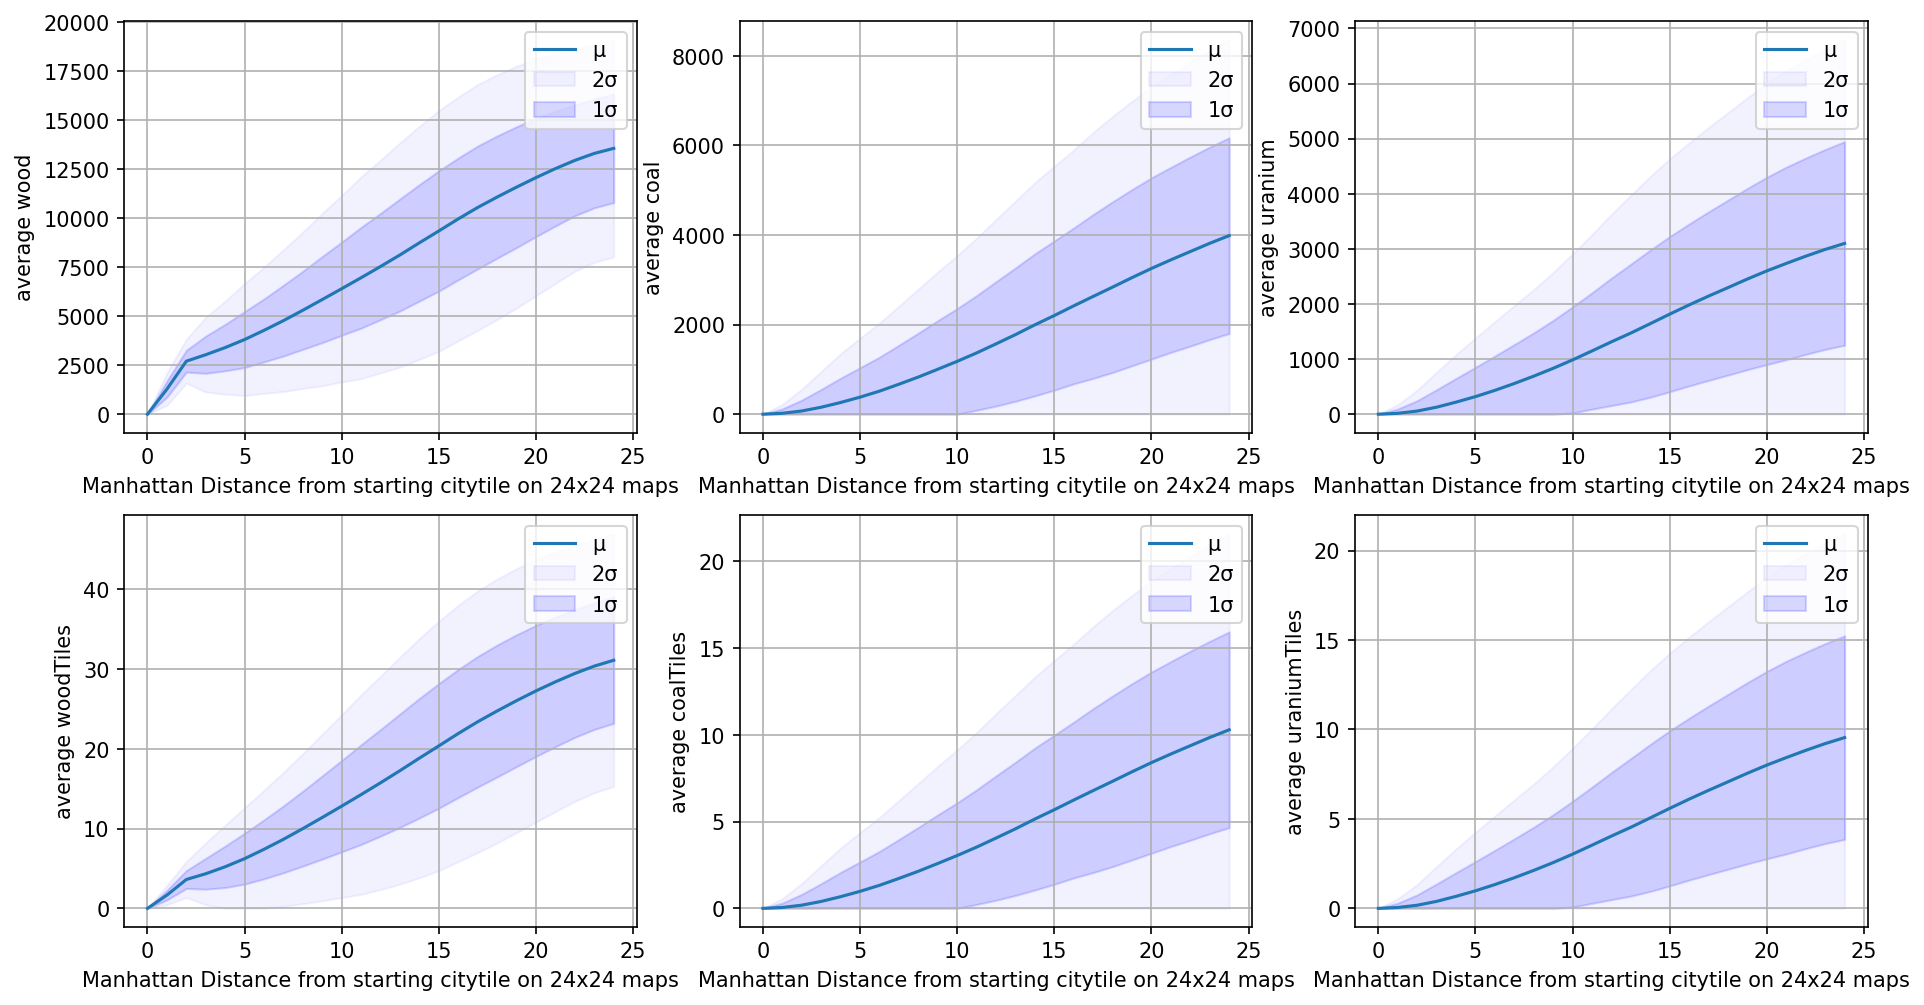

In [209]:
plot_averages_across_distance(24)

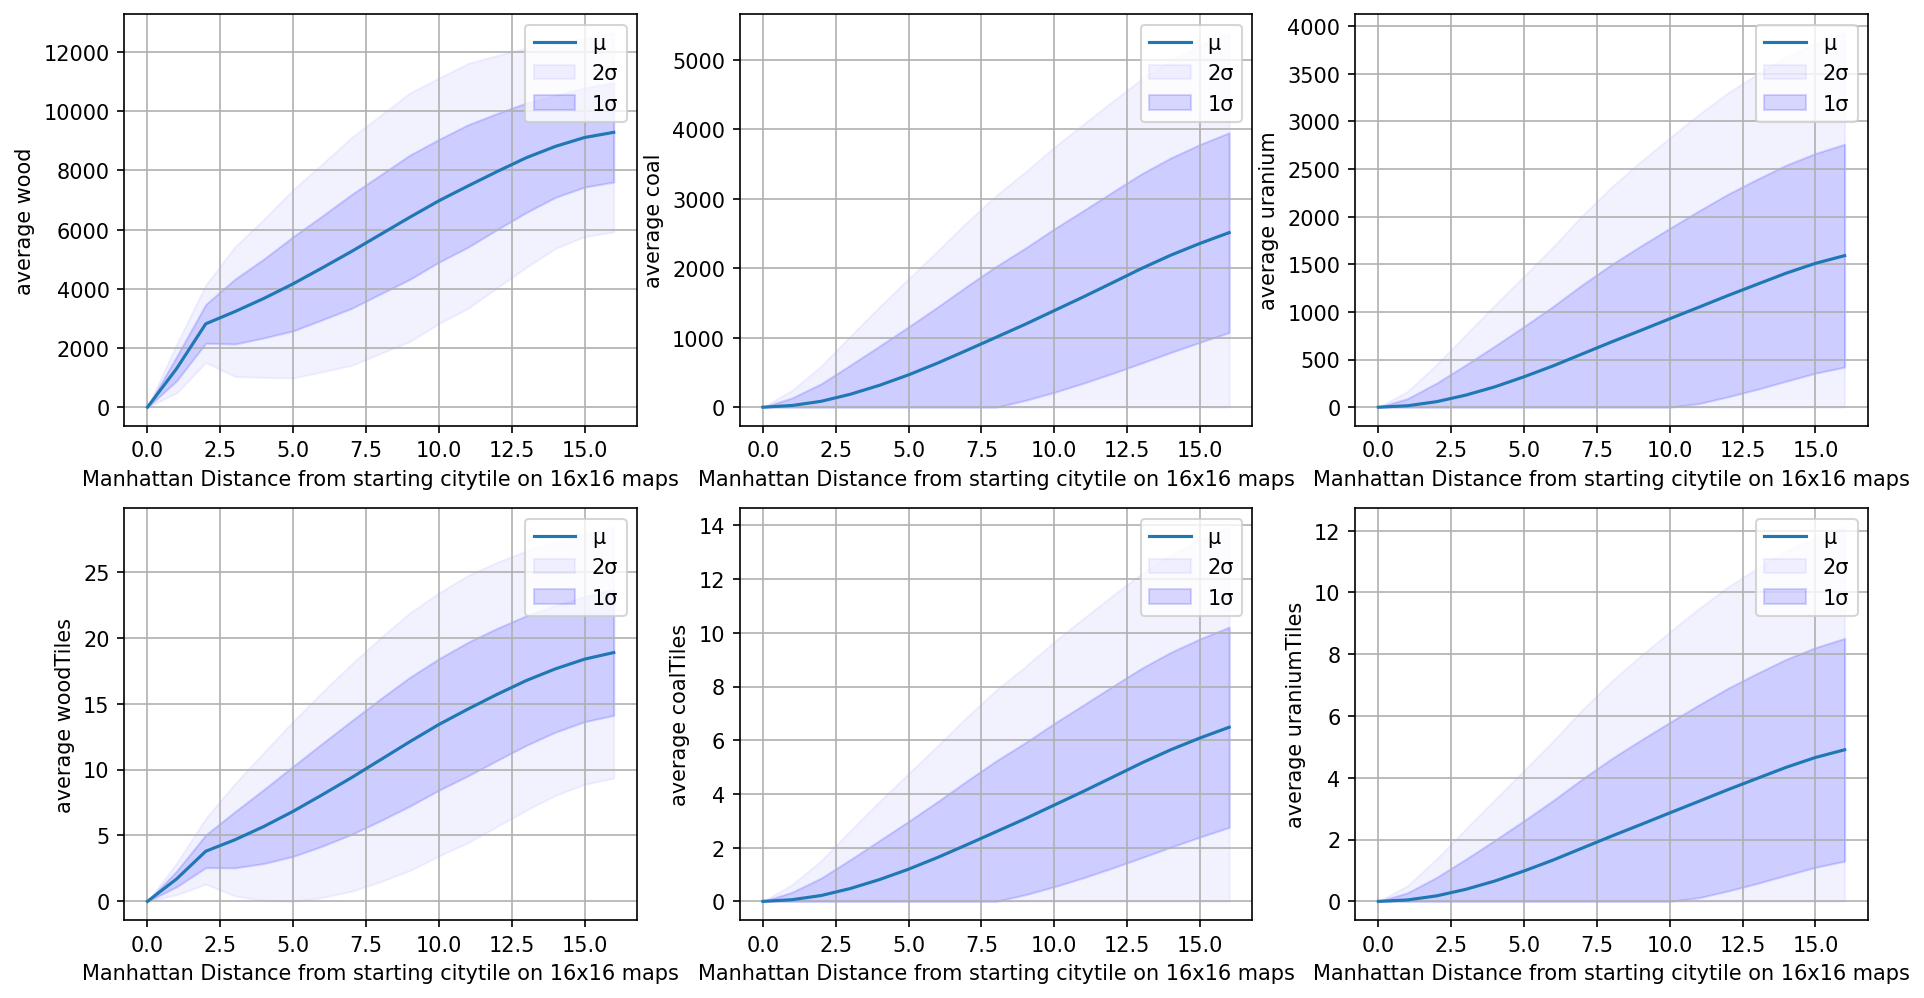

In [211]:
plot_averages_across_distance(16)

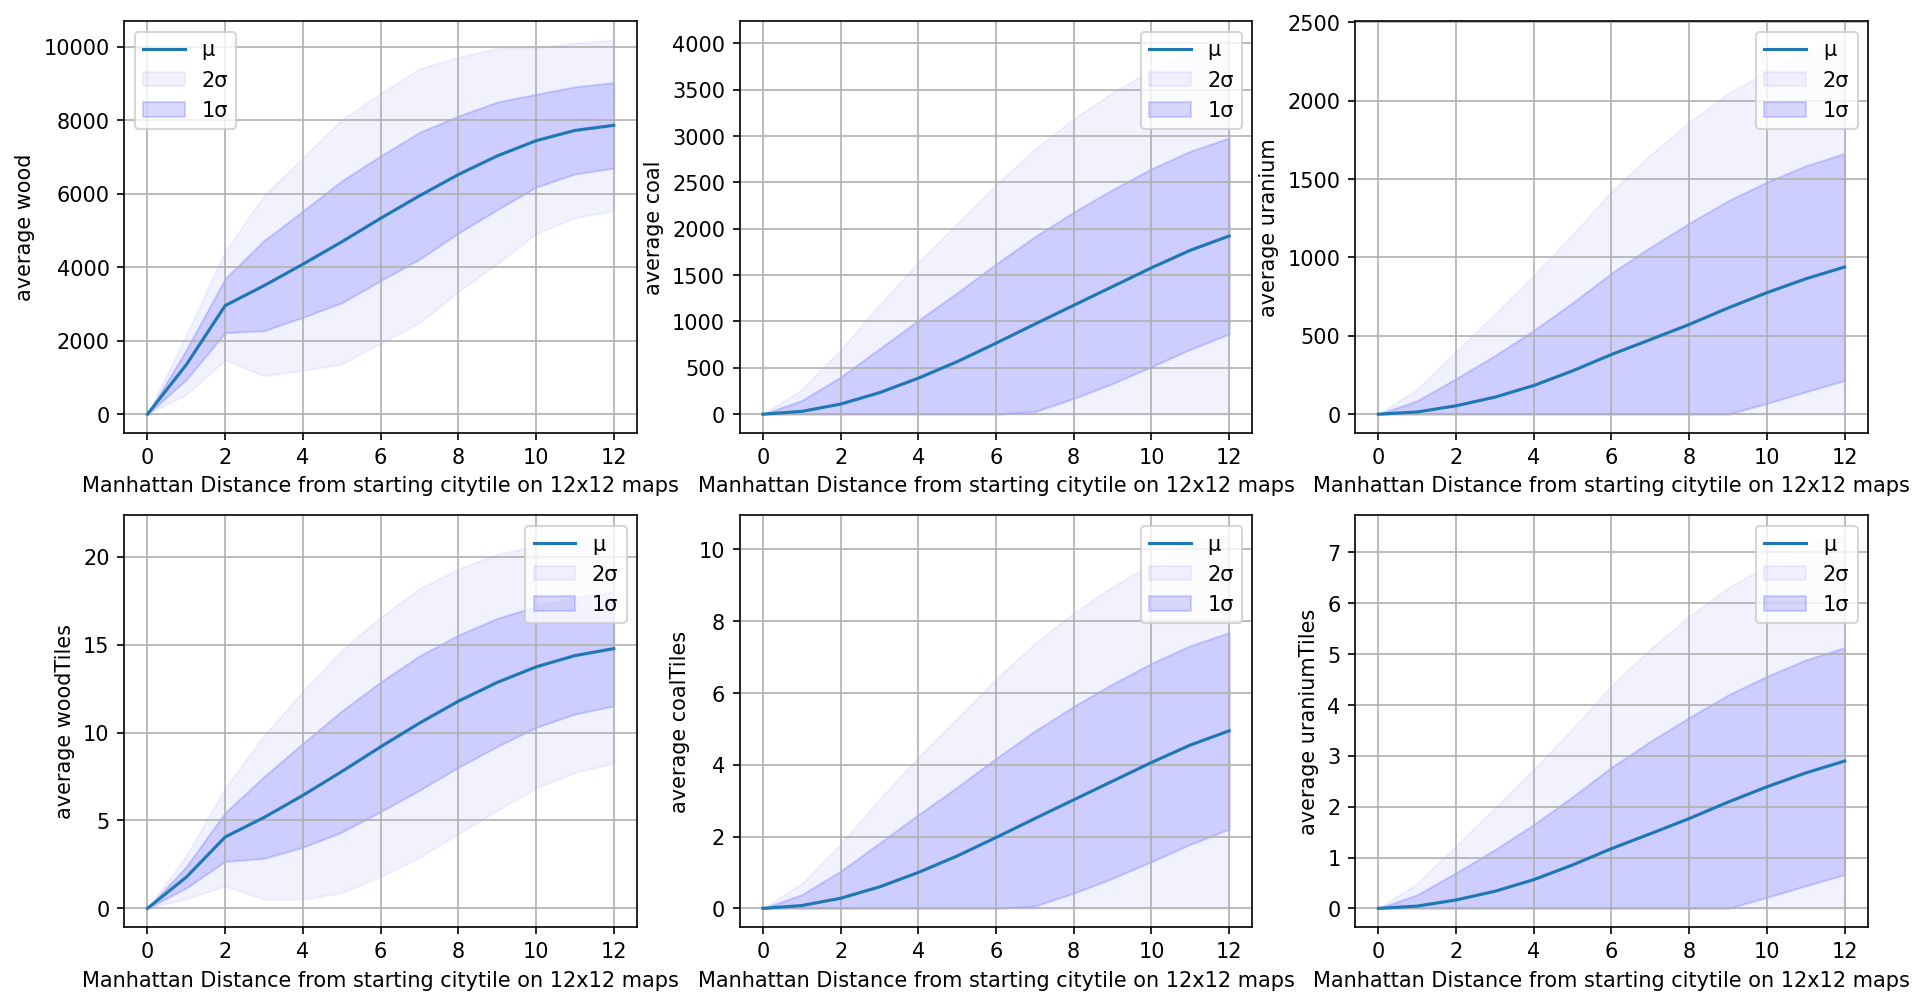

In [212]:
plot_averages_across_distance(12)